In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("PJME_hourly.csv")

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [4]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [5]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


# **Data Preprocessing**

In [6]:
df.set_index("Datetime", inplace=True)

In [7]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [8]:
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [9]:
pd.to_datetime(df.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [10]:
df.index = pd.to_datetime(df.index)

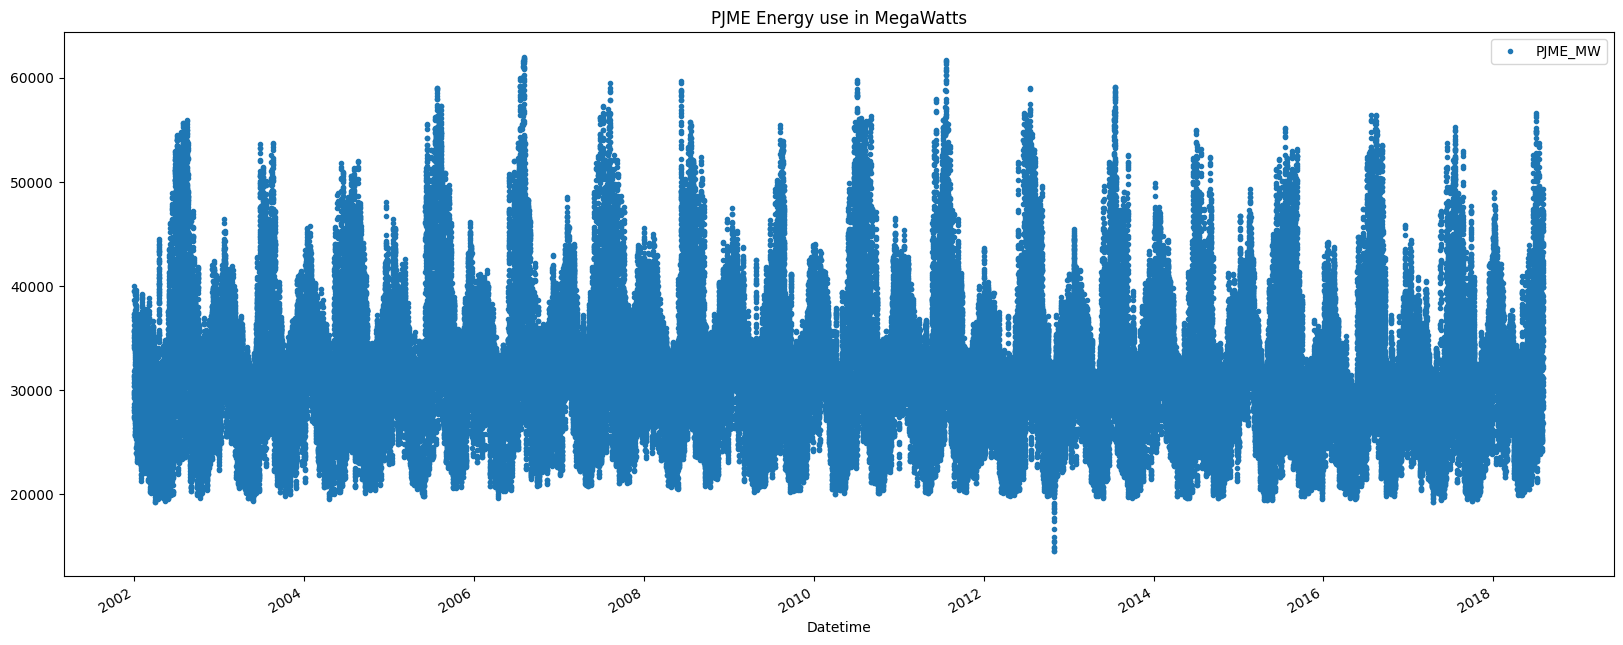

In [11]:
df.plot(title="PJME Energy use in MegaWatts",
        figsize=(20, 8),
        style=".",
        color=sns.color_palette()[0])

plt.show()

# **Train and test split**

In [12]:
x = df[df.index < "01-01-2015"]
y = df[df.index >= "01-01-2015"]

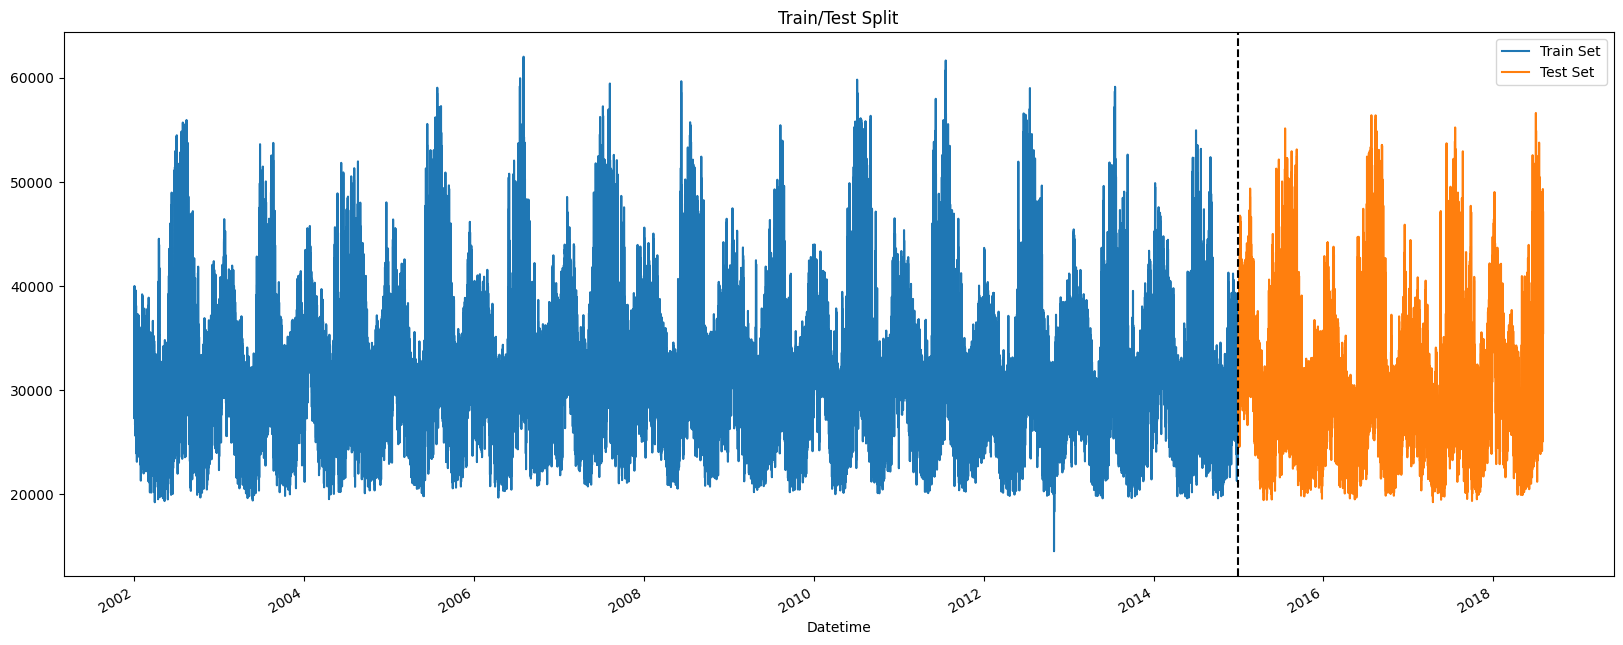

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
x.plot(ax=ax, label = "train set", title="Train/Test Split")
y.plot(ax=ax, label = "test set")
ax.axvline("01-01-2015", color="black", ls="--")
ax.legend(["Train Set", "Test Set"])
plt.show()

# **Feature creation**

In [14]:
df["hour"] = df.index.hour
df["day_of_week"] = df.index.day_of_week
df.head()

,PJME_MW,hour,day_of_week
Datetime,,,
2002-12-31 01:00:00,26498.0,1,1
2002-12-31 02:00:00,25147.0,2,1
2002-12-31 03:00:00,24574.0,3,1
2002-12-31 04:00:00,24393.0,4,1
2002-12-31 05:00:00,24860.0,5,1


In [15]:
df["quarter"] = df.index.quarter
df["month"] = df.index.month
df["year"] = df.index.year
df["day_of_year"] = df.index.day_of_year

In [16]:
df.head()

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


In [17]:
train = df[df.index < "01-01-2015"]
test = df[df.index >= "01-01-2015"]

In [18]:
x_train = train.drop("PJME_MW", axis=1)
x_test = test.drop("PJME_MW", axis=1)
y_train = train["PJME_MW"]
y_test = test["PJME_MW"]

# **Model**

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(n_estimators=1000, learning_rate=0.01, early_stopping_rounds=50)
model.fit(x_train, y_train,
         eval_set=[(x_train, y_train) ,(x_test, y_test)], verbose=100)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.26089


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Feature Importance**

In [20]:
importance_df = pd.DataFrame(data=model.feature_importances_, index=model.feature_names_in_, columns=["Importance"])
importance_df.sort_values("Importance")

,Importance
year,0.023824
quarter,0.028881
day_of_year,0.118251
day_of_week,0.162005
month,0.203161
hour,0.463878


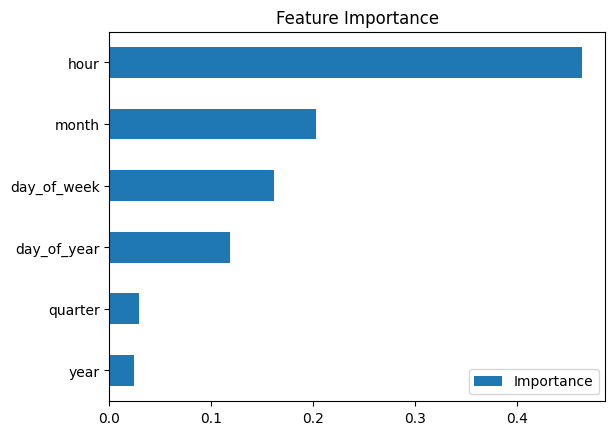

In [21]:
importance_df.sort_values("Importance").plot(kind="barh", title="Feature Importance")
plt.show()

# **Prediction on testset**

In [22]:
test["Prediction"] = model.predict(x_test)

<ipython-input-22-8b14319b119b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Prediction"] = model.predict(x_test)


In [23]:
df = df.merge(test["Prediction"], how="left", left_index=True, right_index=True)
df.head()

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,Prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN


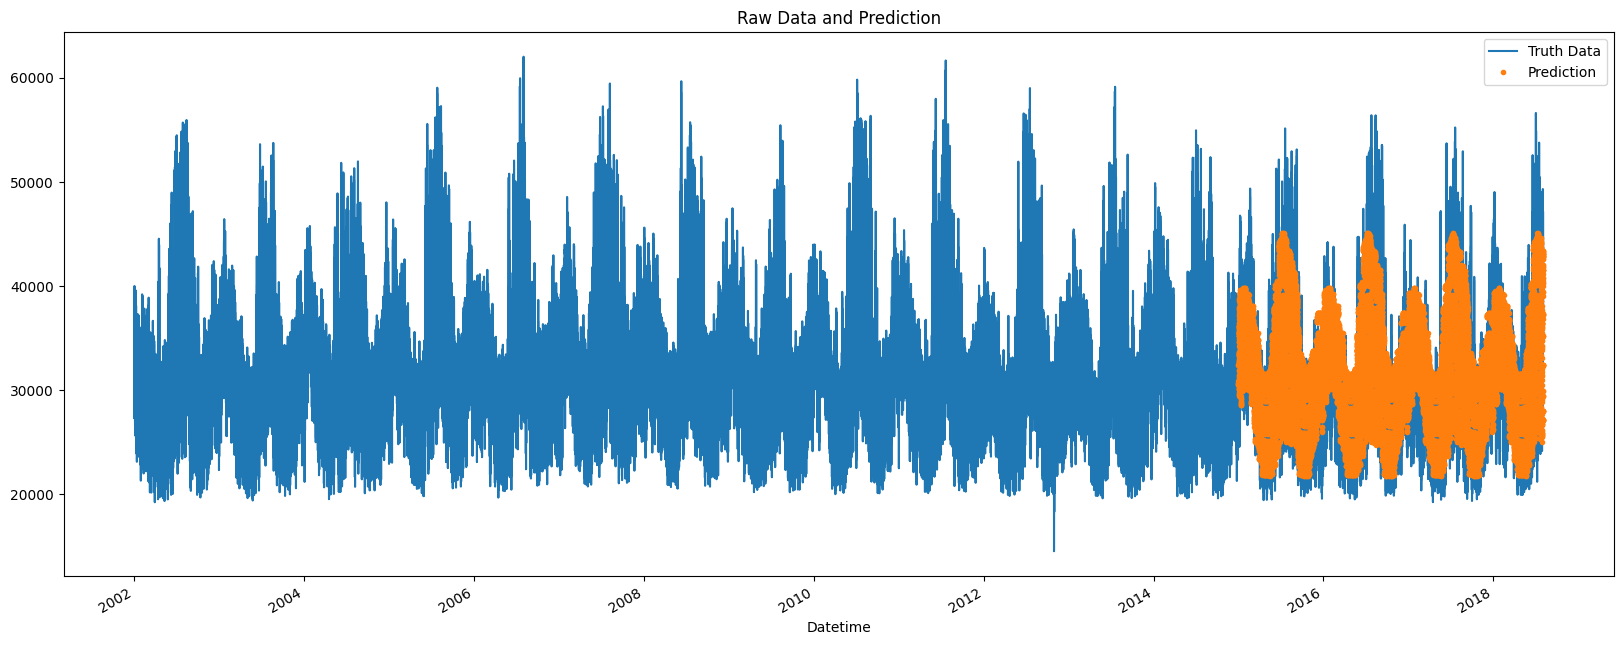

In [24]:
ax = df["PJME_MW"].plot(figsize=(20,8))
df["Prediction"].plot(ax=ax, style=".")
plt.legend(["Truth Data","Prediction"])
plt.title("Raw Data and Prediction")
plt.show()

In [25]:
model.score(x_test, y_test)

0.6635635163510866

In [26]:
score = np.sqrt(mean_squared_error(test["PJME_MW"], test["Prediction"]))
print(f"RMSE score on test set:{score:0.2f}")

RMSE score on test set:3741.03
